<a href="https://colab.research.google.com/github/Kalhara02/Statistics-and-Machine-Learning/blob/main/Chapter%202_Individual%20Exercise%201_Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Loading the Dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
# Dataset Size
df.shape

(442, 11)

In [11]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [12]:
# Separate Features and Target
X = df.drop("target", axis=1)
y = df["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (442, 10)
Target shape: (442,)


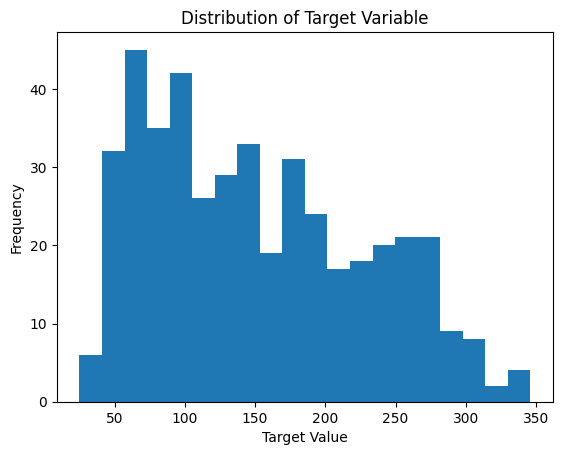

In [14]:
#Visualize Target Variables
plt.hist(y, bins=20)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.show()

In [15]:
# Split into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Decision Tree Performance
MSE: 5941.7027027027025
RMSE: 77.08244094930247
R² Score: -0.07450922562649187


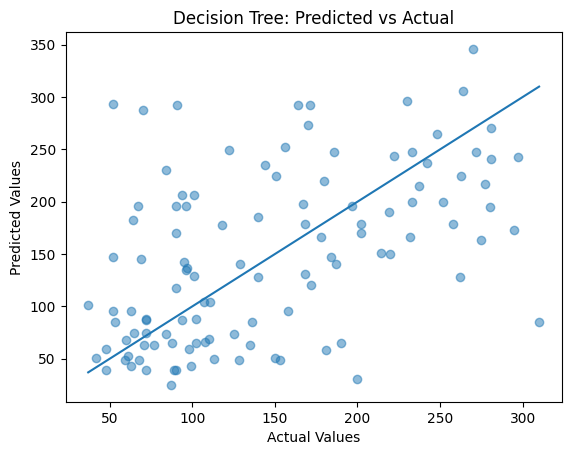

In [20]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Performance")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R² Score:", dt_r2)

plt.scatter(y_test, dt_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Predicted vs Actual")
plt.show()

Random Forest Performance
MSE: 2967.9368047297294
RMSE: 54.47877389157845
R² Score: 0.4632724595412875


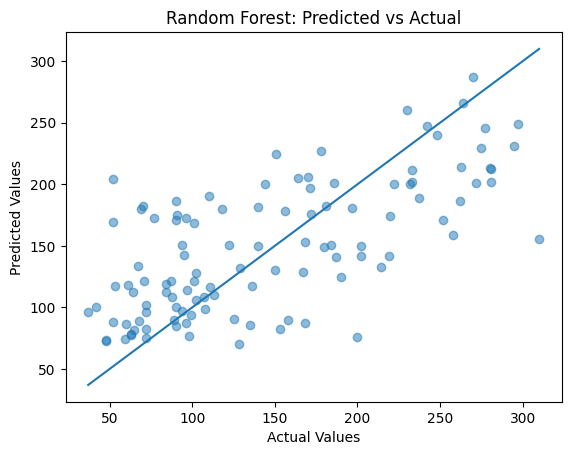

In [21]:
# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200, random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Performance")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)

plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

Extra Trees Performance
MSE: 2673.8141790540544
RMSE: 51.70893712941753
R² Score: 0.5164621747739672


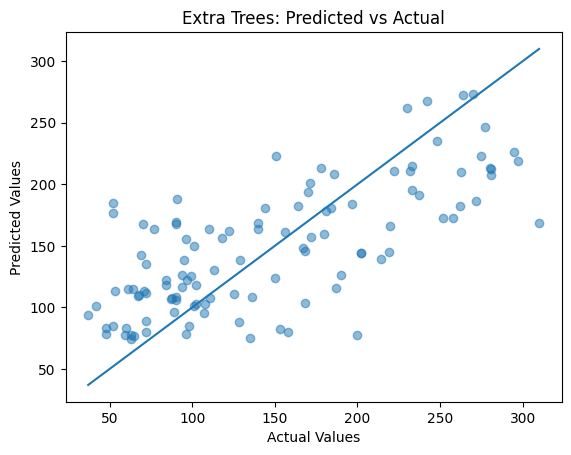

In [22]:
# Extra Trees Regressor
et = ExtraTreesRegressor(
    n_estimators=200, random_state=42, n_jobs=-1
)
et.fit(X_train, y_train)

et_pred = et.predict(X_test)

et_mse = mean_squared_error(y_test, et_pred)
et_rmse = np.sqrt(et_mse)
et_r2 = r2_score(y_test, et_pred)

print("Extra Trees Performance")
print("MSE:", et_mse)
print("RMSE:", et_rmse)
print("R² Score:", et_r2)

plt.scatter(y_test, et_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Extra Trees: Predicted vs Actual")
plt.show()

In [ ]:
# The Decision Tree gives the lowest accuracy because it learns very specific rules from the training data and tends to overfit, so it does not generalize well.
# Random Forest improves accuracy by combining many trees and averaging their predictions, which reduces overfitting and improves generalization.
# Extra Trees performs slightly better than Random Forest because it adds more randomness, making the model more robust to noise.
# Single tree models are simple and easy to interpret but have high variance. Ensemble methods generalize better because they reduce variance by combining multiple trees instead of relying on just one.